In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [3]:
usedcars=pd.read_csv(r'C:\Users\USER\Downloads\used_car_dataset.csv')

In [4]:
usedcars.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [5]:
usedcars.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [6]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [20]:
usedcars=usedcars.dropna(subset='kmDriven').reset_index(drop=True)

In [21]:
usedcars['model']=usedcars['model'].str.lower()
usedcars['kmDriven']=usedcars['kmDriven'].str.replace('km','').str.replace(',','').str.strip().apply(lambda x:int(float(x)))
usedcars['AskPrice']=usedcars['AskPrice'].str.replace(',','').str.replace('₹','').str.strip().apply(lambda x:int(x))

In [22]:
total_companies=usedcars['Brand'].nunique()
top_10_car_companies=usedcars['Brand'].value_counts().head(10).index.tolist()
top_10_usedcars=usedcars[usedcars['Brand'].isin(top_10_car_companies)]

In [23]:
perc=usedcars['Brand'].isin(top_10_car_companies).sum()/usedcars.shape[0]*100
print(f'Out of {total_companies} campanies top 10 campies own {perc}% of the market')

Out of 38 campanies top 10 campies own 84.53067645516518% of the market


In [24]:
usedcars[usedcars['Brand'].isin(top_10_car_companies)].describe()

,Year,Age,kmDriven,AskPrice
count,8060.000000,8060.000000,8060.000000,8.060000e+03
mean,2016.238710,7.761290,71084.106203,9.802230e+05
std,4.117138,4.117138,55162.064299,1.422688e+06
min,1986.000000,0.000000,0.000000,1.500000e+04
25%,2014.000000,5.000000,45000.000000,3.600000e+05
50%,2017.000000,7.000000,65260.500000,5.850000e+05
75%,2019.000000,10.000000,86000.000000,1.027750e+06
max,2024.000000,38.000000,980002.000000,2.600000e+07


In [20]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9535 entries, 0 to 9534
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 819.5+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_7340\2494895948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_10_usedcars,x='Brand',palette='viridis',order=top_10_usedcars['Brand'].value_counts(ascending=True).index)


<Axes: xlabel='Brand', ylabel='count'>

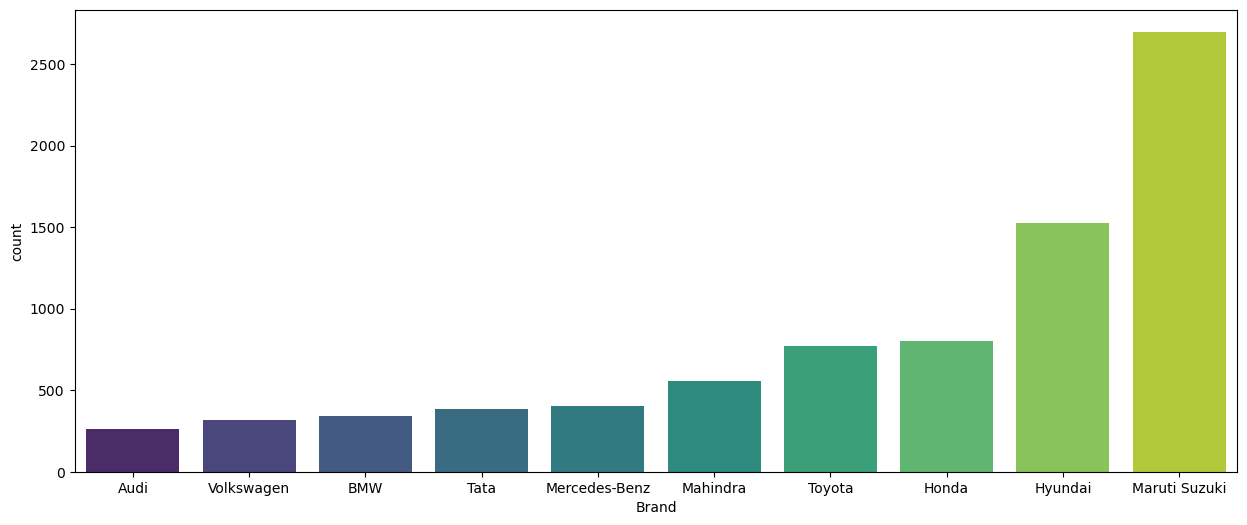

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(data=top_10_usedcars,x='Brand',palette='viridis',order=top_10_usedcars['Brand'].value_counts(ascending=True).index)

<Axes: title={'center': 'top 10 most selling cars in used car market'}, ylabel='model'>

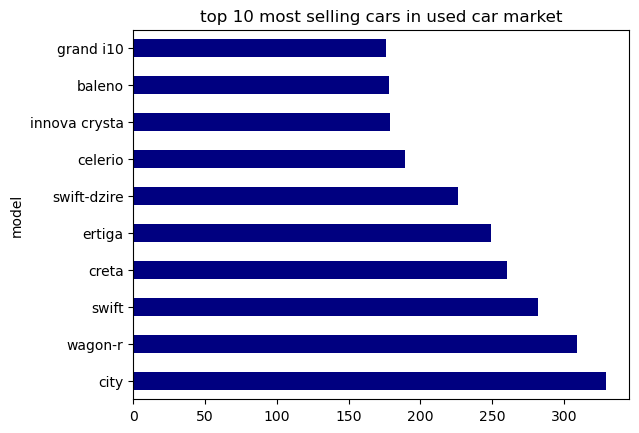

In [29]:
top_10_usedcars['model'].value_counts().head(10).plot(kind='barh',title='top 10 most selling cars in used car market',colormap='jet')

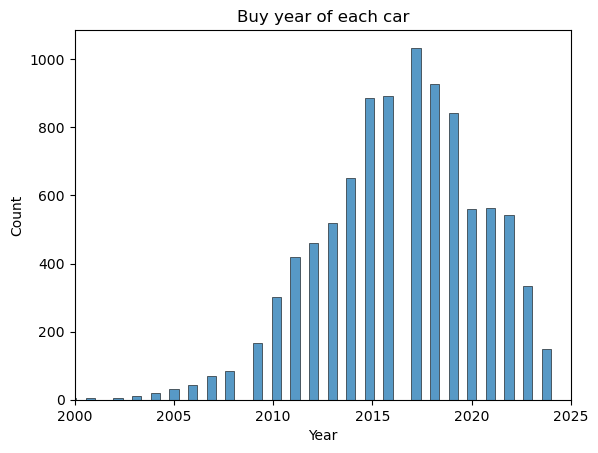

In [30]:
sns.histplot(data=usedcars,x='Year')
plt.title('Buy year of each car')
_ = plt.xlim(2000,2025)

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\505301081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=usedcars,x='Owner',palette='bright')


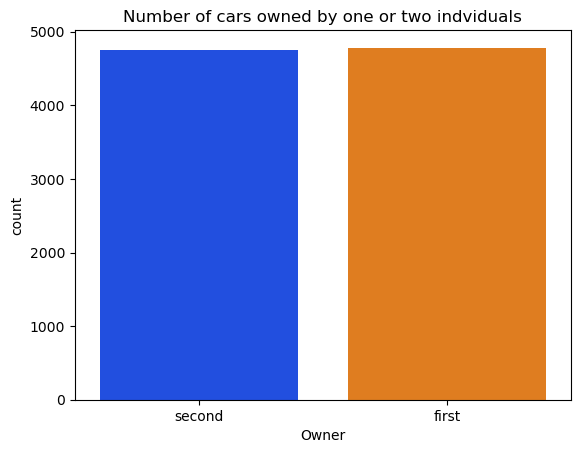

In [35]:
sns.countplot(data=usedcars,x='Owner',palette='bright')
_ = plt.title('Number of cars owned by one or two indviduals')

Text(0, 0.5, 'count')

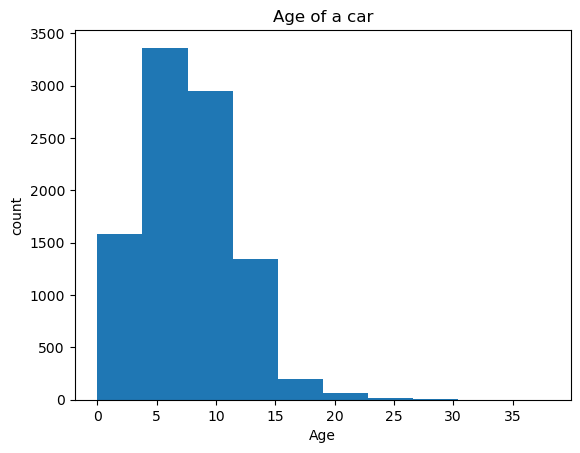

In [38]:
plt.hist(x=usedcars['Age'])
plt.title('Age of a car')
plt.xlabel('Age')
plt.ylabel('count')

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\1440116835.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=usedcars,x='Transmission',palette='bright')


<Axes: xlabel='Transmission', ylabel='count'>

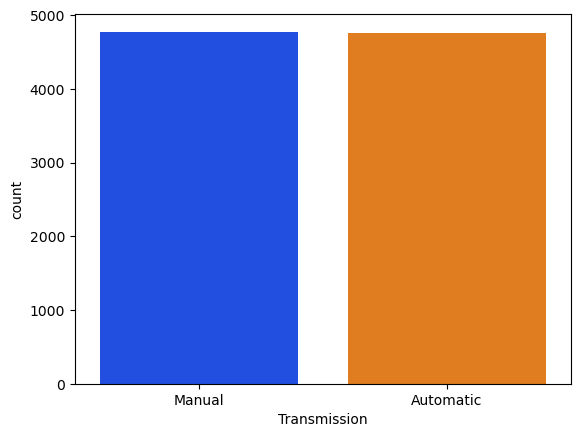

In [45]:
sns.countplot(data=usedcars,x='Transmission',palette='bright')

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\2268991918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=usedcars,x='FuelType',palette='viridis')


<Axes: xlabel='FuelType', ylabel='count'>

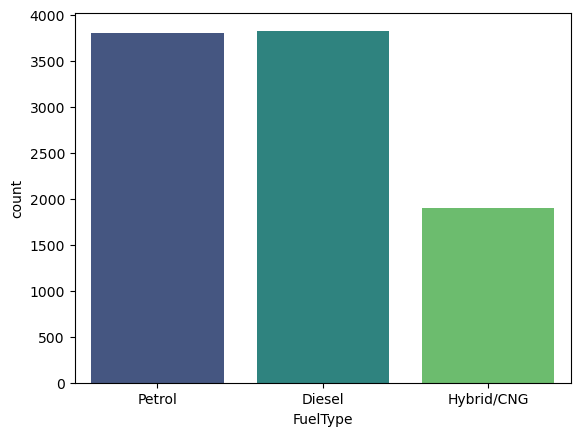

In [46]:
sns.countplot(data=usedcars,x='FuelType',palette='viridis')

(10000.0, 3000000.0)

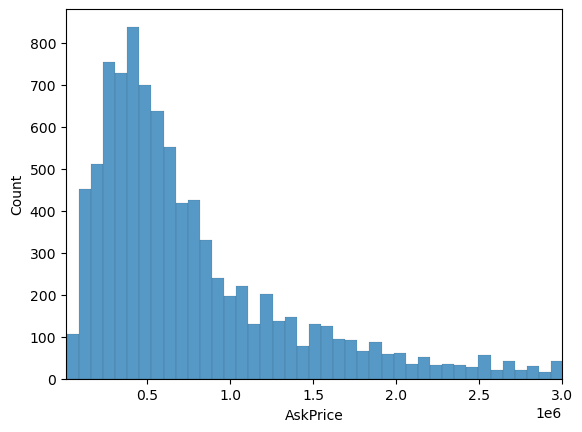

In [47]:
sns.histplot(usedcars['AskPrice'])
plt.xlim(10000, 3000000)

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\3606257414.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usedcars,x='Owner',y='Age',estimator='mean',errorbar=None,palette='viridis')


<Axes: xlabel='Owner', ylabel='Age'>

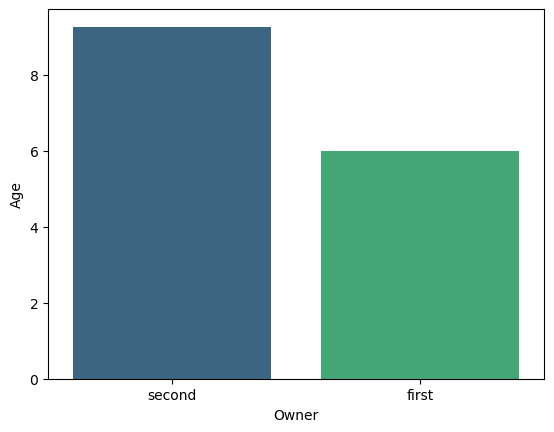

In [51]:
sns.barplot(data=usedcars,x='Owner',y='Age',estimator='mean',errorbar=None,palette='viridis')

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\287365644.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usedcars,x='Owner',y='kmDriven',estimator='mean',errorbar=None,palette='bright')


<Axes: xlabel='Owner', ylabel='kmDriven'>

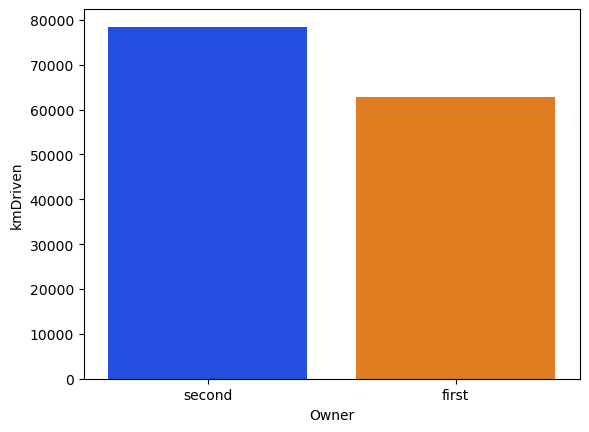

In [53]:
sns.barplot(data=usedcars,x='Owner',y='kmDriven',estimator='mean',errorbar=None,palette='bright')

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\2553551739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usedcars,x='Owner',y='AskPrice',estimator='mean',errorbar=None,palette='viridis')


<Axes: xlabel='Owner', ylabel='AskPrice'>

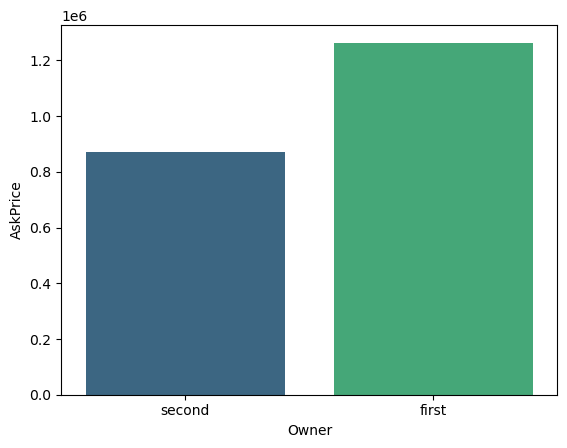

In [54]:
sns.barplot(data=usedcars,x='Owner',y='AskPrice',estimator='mean',errorbar=None,palette='viridis')

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\1450266441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usedcars,x='FuelType',y='Age',estimator='mean',errorbar=None,palette='dark')


<Axes: xlabel='FuelType', ylabel='Age'>

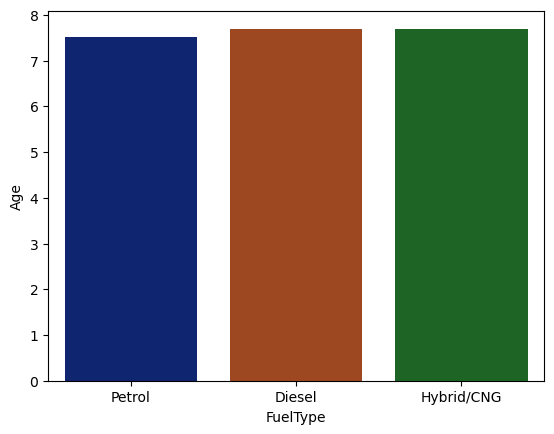

In [56]:
sns.barplot(data=usedcars,x='FuelType',y='Age',estimator='mean',errorbar=None,palette='dark')

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\3393999416.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=usedcars,x='FuelType',y='kmDriven',estimator='mean',errorbar=None,palette='dark')


<Axes: xlabel='FuelType', ylabel='kmDriven'>

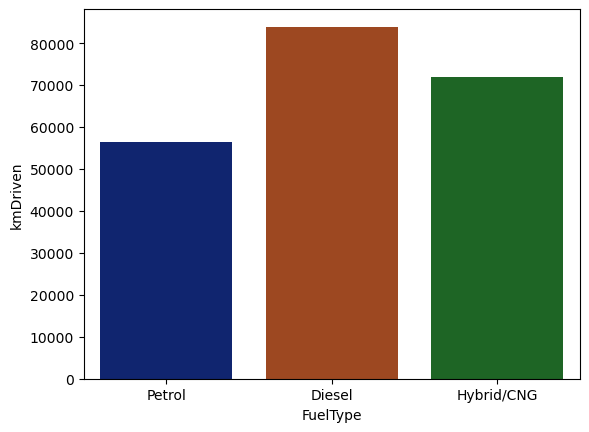

In [57]:
sns.barplot(data=usedcars,x='FuelType',y='kmDriven',estimator='mean',errorbar=None,palette='dark')

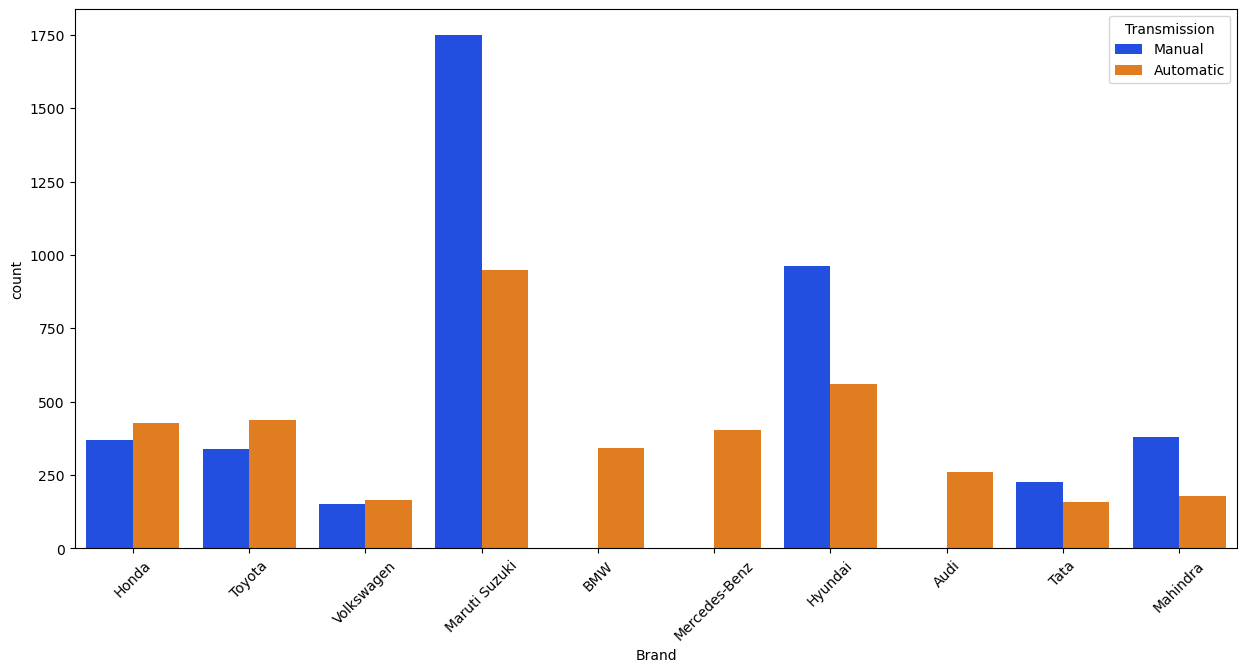

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(data=top_10_usedcars,x='Brand',hue='Transmission',palette='bright')
_ =plt.xticks(rotation=45)

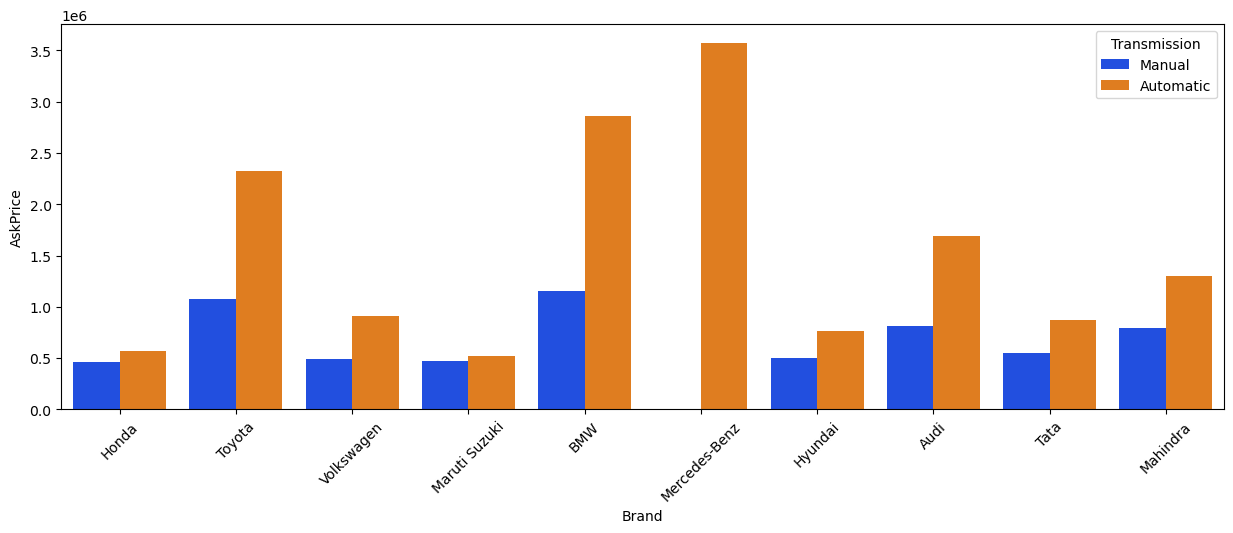

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_usedcars,x='Brand',y='AskPrice',estimator='mean',hue='Transmission',errorbar=None,palette='bright')
_ =plt.xticks(rotation=45)

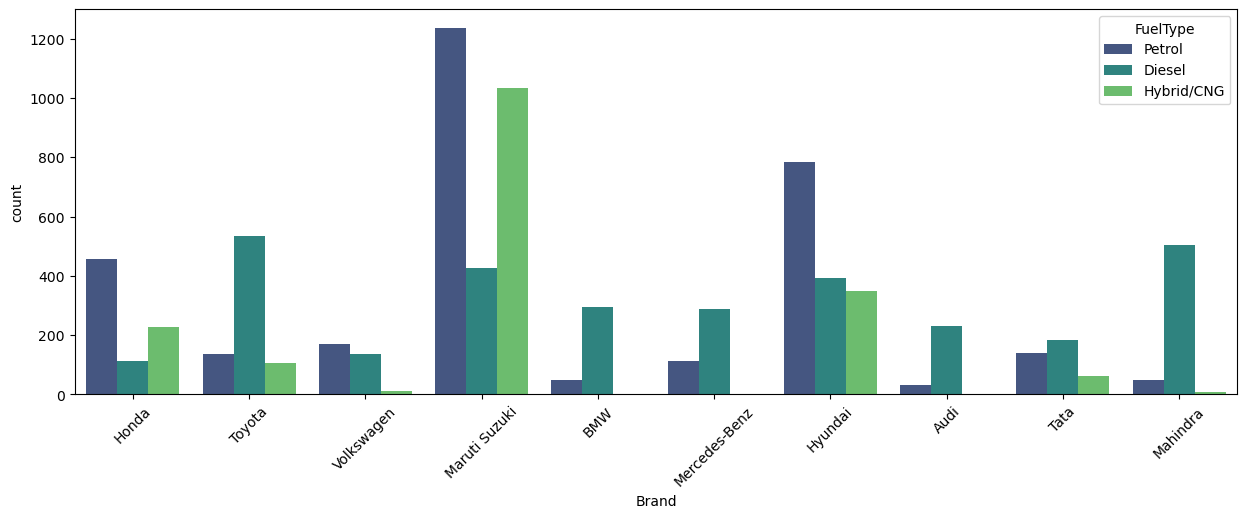

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(data=top_10_usedcars,x='Brand',hue='FuelType',palette='viridis')
_ =plt.xticks(rotation=45)

<Axes: xlabel='Brand,Transmission'>

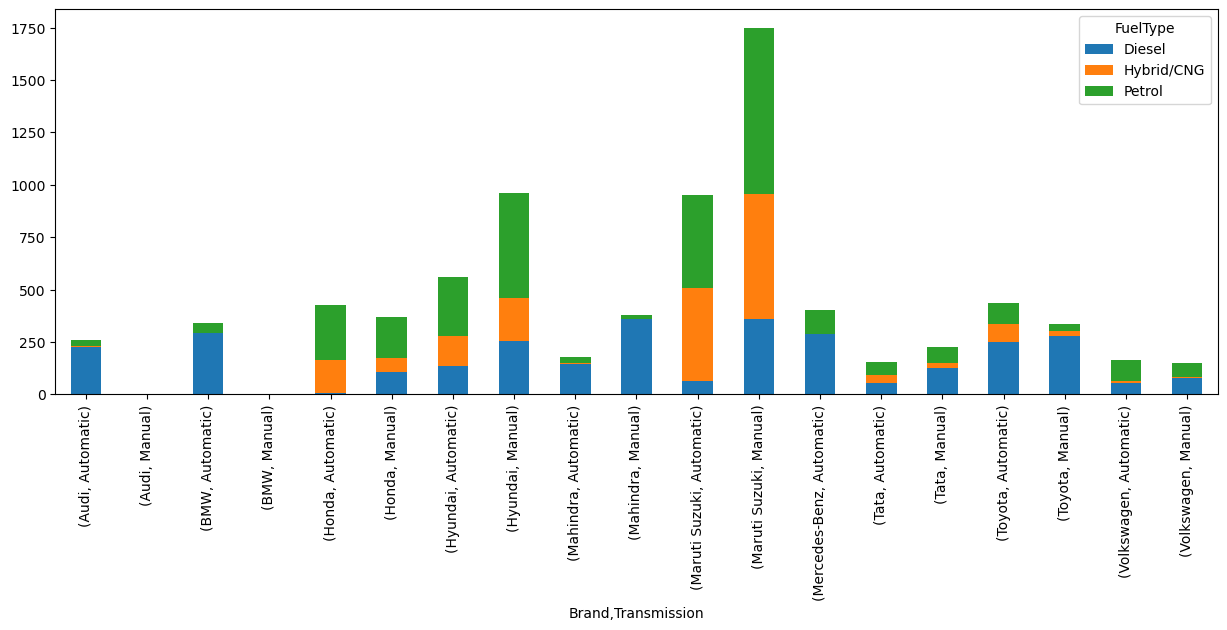

In [74]:
pd.crosstab(index=[top_10_usedcars['Brand'],top_10_usedcars['Transmission']],columns=top_10_usedcars['FuelType']).plot(kind='bar',stacked=True,figsize=(15,5))

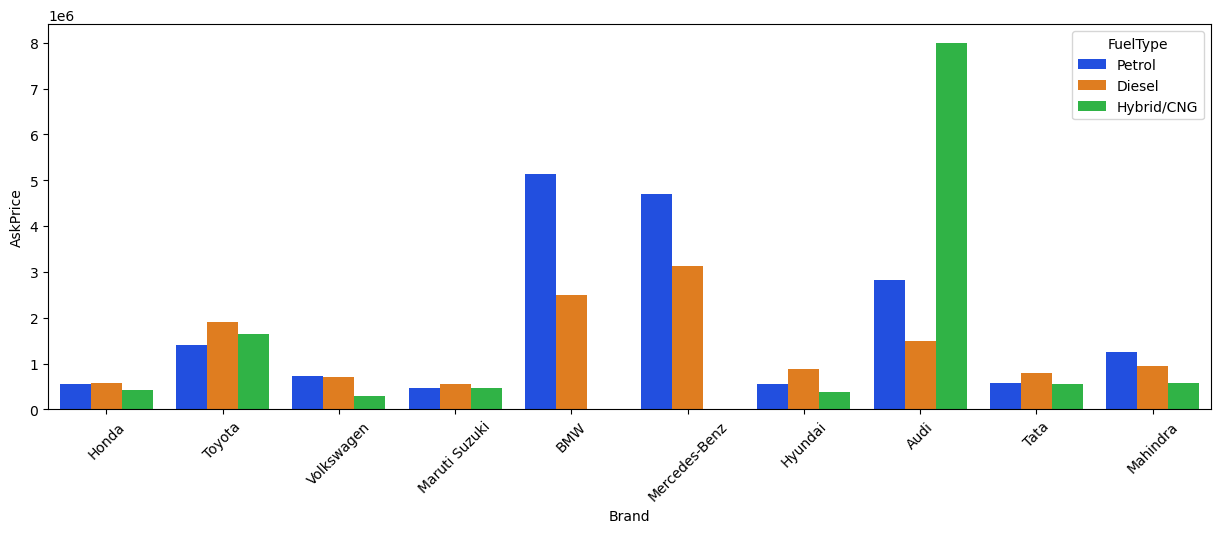

In [76]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_usedcars,x='Brand',y='AskPrice',hue='FuelType',estimator='mean',errorbar=None,palette='bright')
_ =plt.xticks(rotation=45)

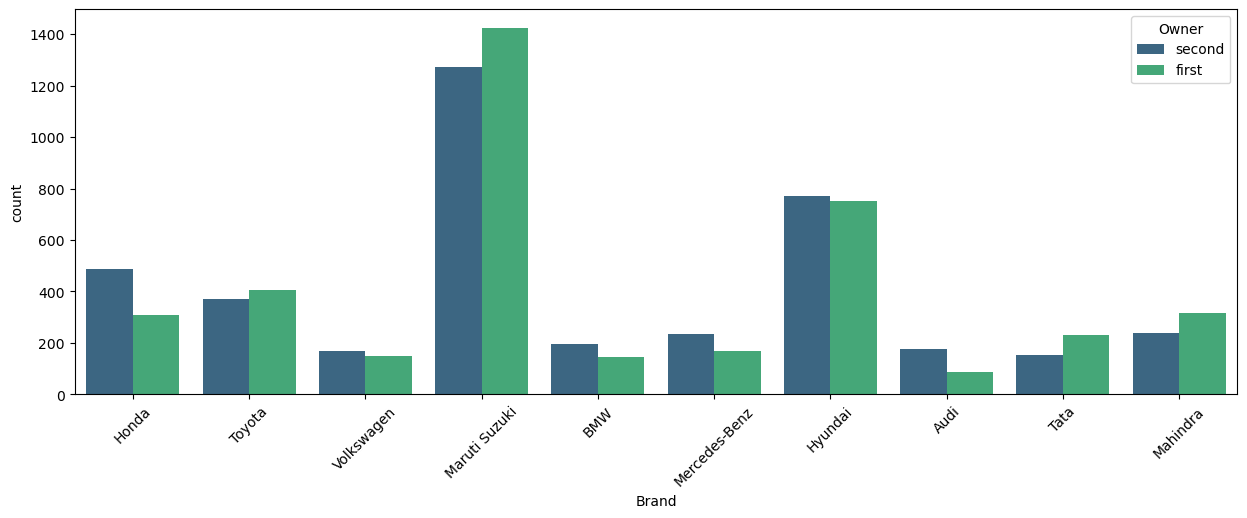

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(data=top_10_usedcars,x='Brand',hue='Owner',palette='viridis')
_ =plt.xticks(rotation=45)

C:\Users\USER\AppData\Local\Temp\ipykernel_7340\2171266367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_usedcars,x='Brand',y='Age',palette='bright',estimator='mean',errorbar=None)


<Axes: xlabel='Brand', ylabel='Age'>

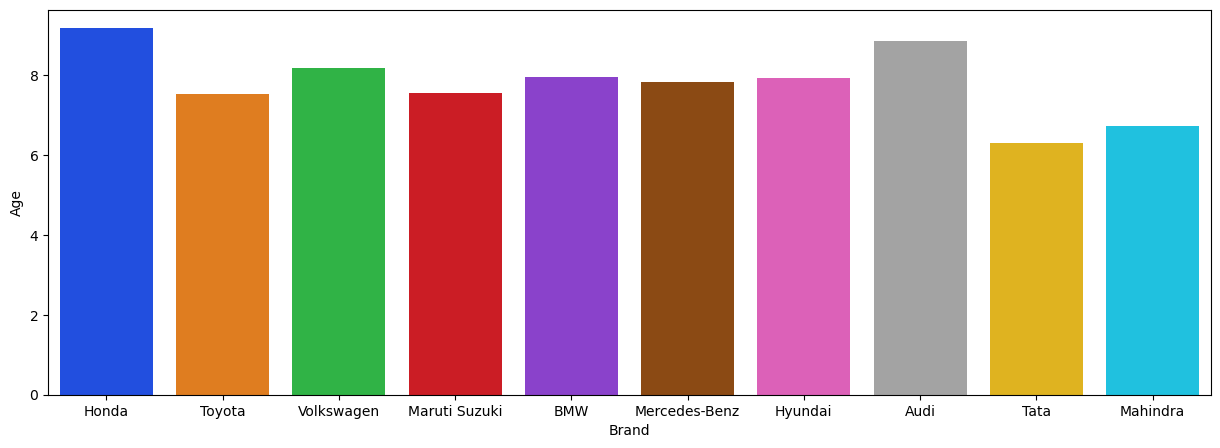

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_usedcars,x='Brand',y='Age',palette='bright',estimator='mean',errorbar=None)

<Axes: xlabel='km Driven', ylabel='Brand'>

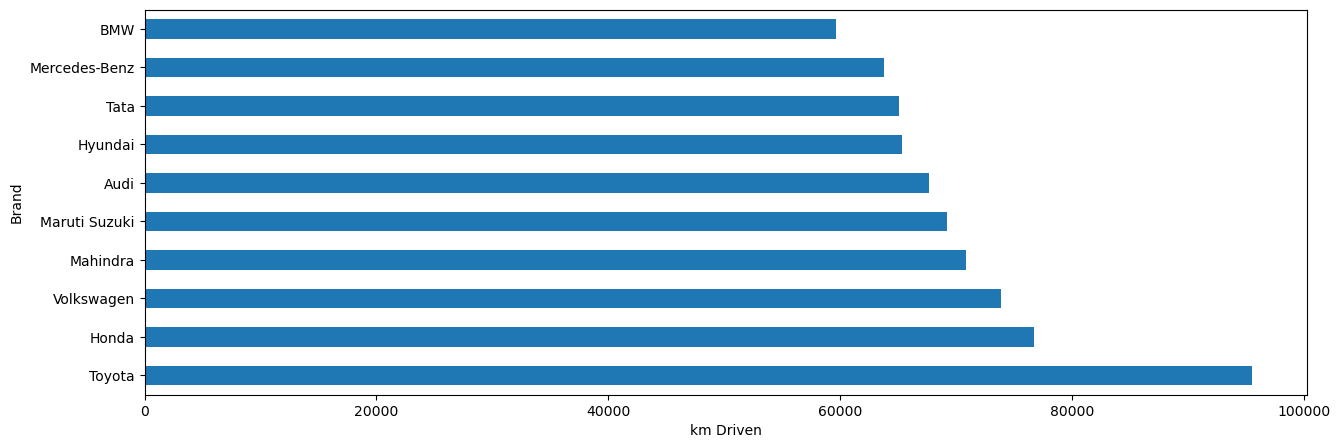

In [82]:
top_10_usedcars.groupby('Brand')['kmDriven'].mean().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),xlabel='km Driven')

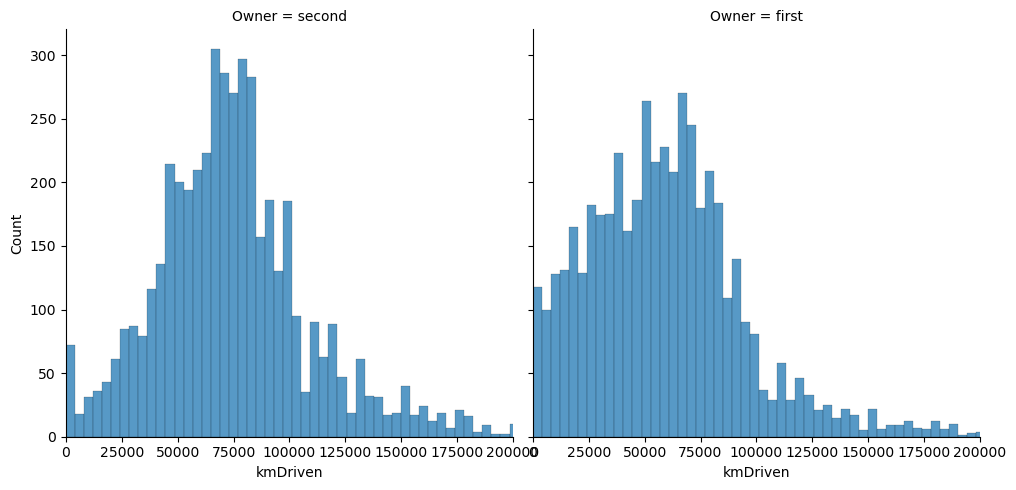

In [83]:
sns.displot(data=usedcars,x='kmDriven',col='Owner')
_ =plt.xlim(0,200000)

(0.0, 200000.0)

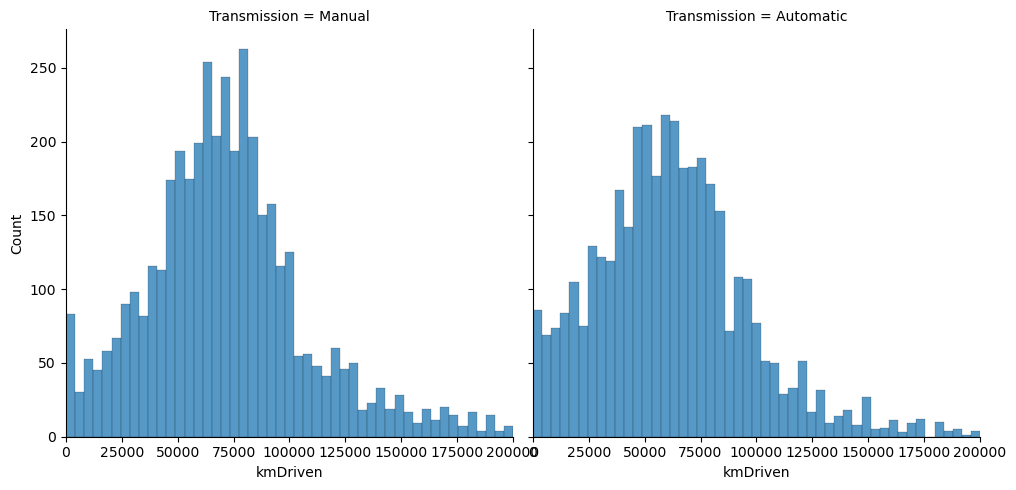

In [85]:
sns.displot(data=top_10_usedcars,x='kmDriven',col='Transmission')
plt.xlim(0,200000)

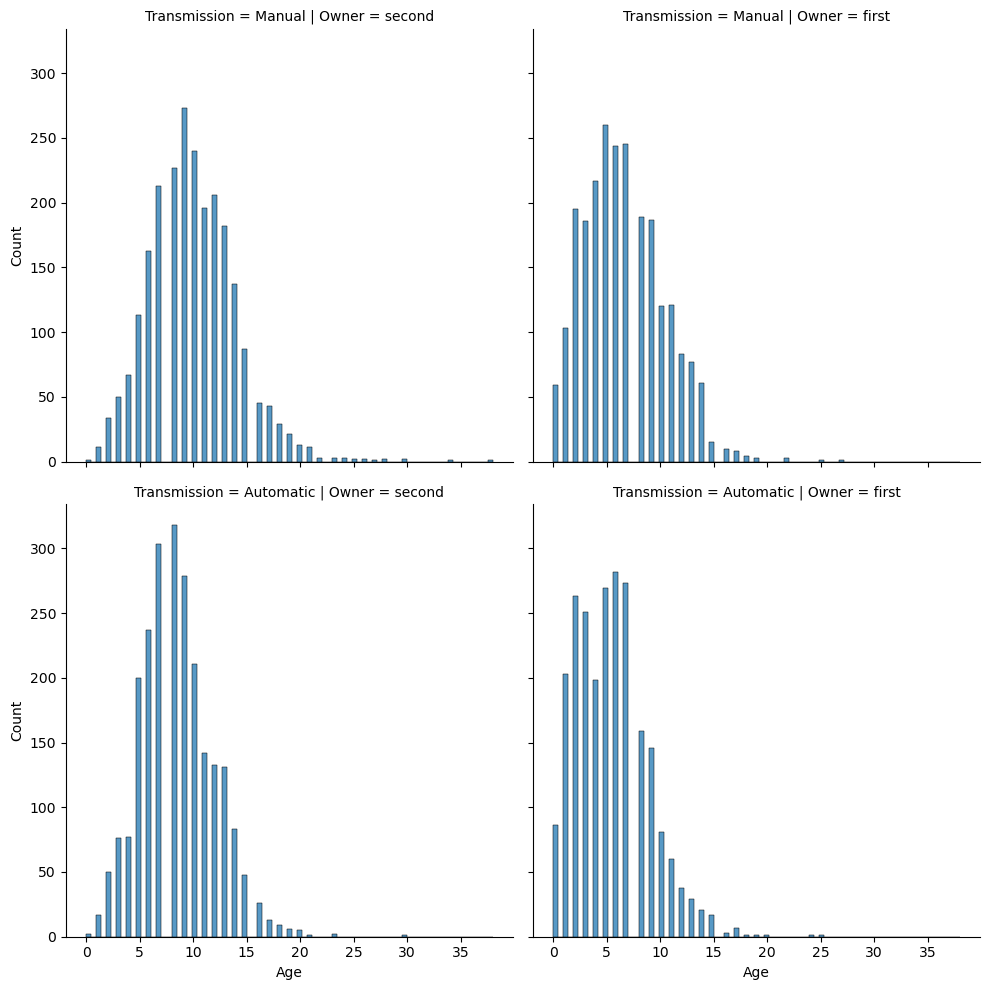

In [86]:
sns.displot(data=usedcars,x='Age',col='Owner',row='Transmission')

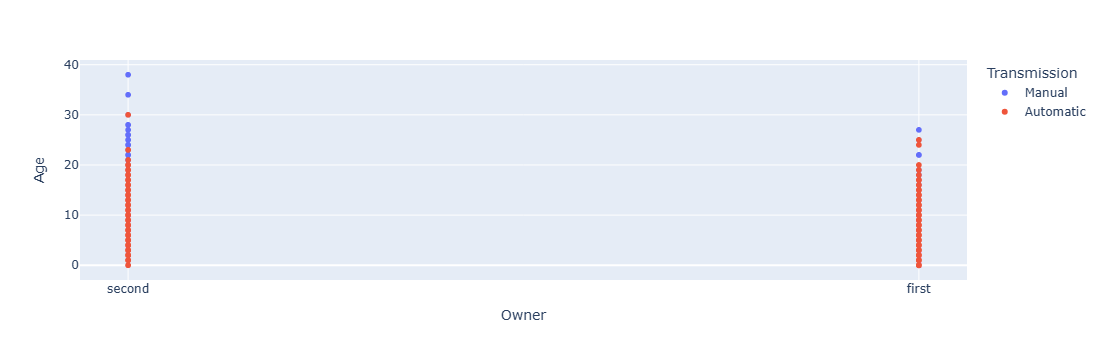

In [12]:
fig=px.scatter(usedcars,x=usedcars['Owner'],y=usedcars['Age'],color='Transmission')
fig

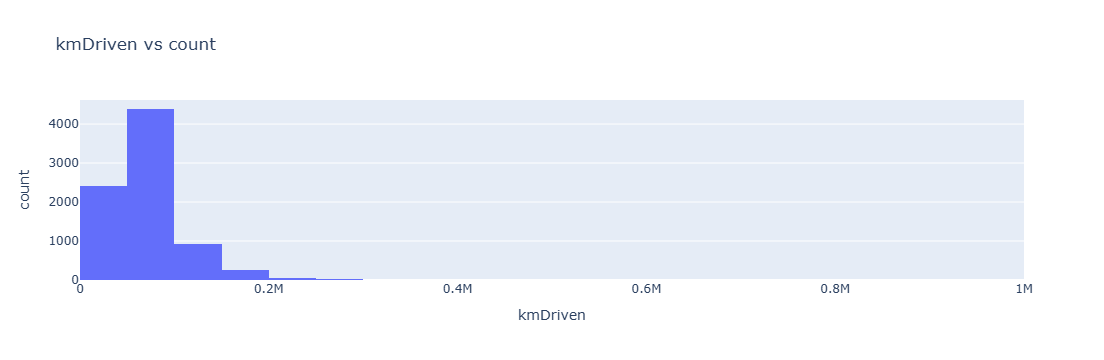

In [27]:
fig1=px.histogram(top_10_usedcars,x='kmDriven',nbins=30,title='kmDriven vs count')
fig1

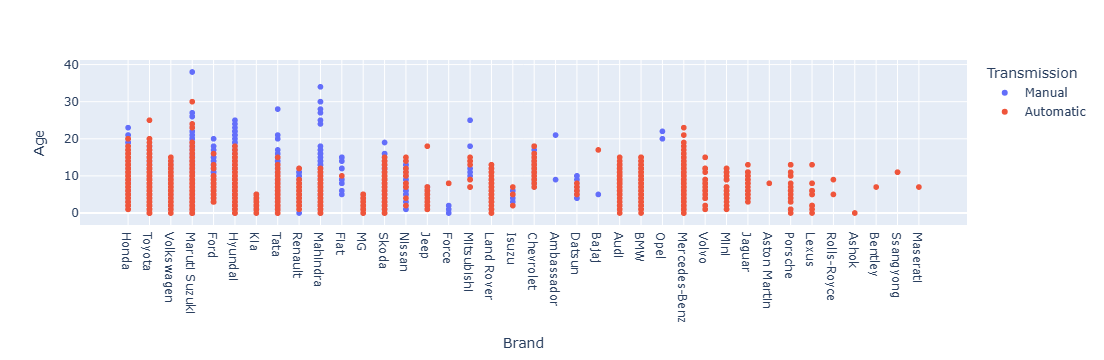

In [29]:
fig2=px.scatter(usedcars,x='Brand',y='Age',color='Transmission')
fig2

In [35]:
fig3=px.bar(top_10_usedcars,x='Owner',y='Age',color='Transmission',color_discrete_sequence=["red", "green"])


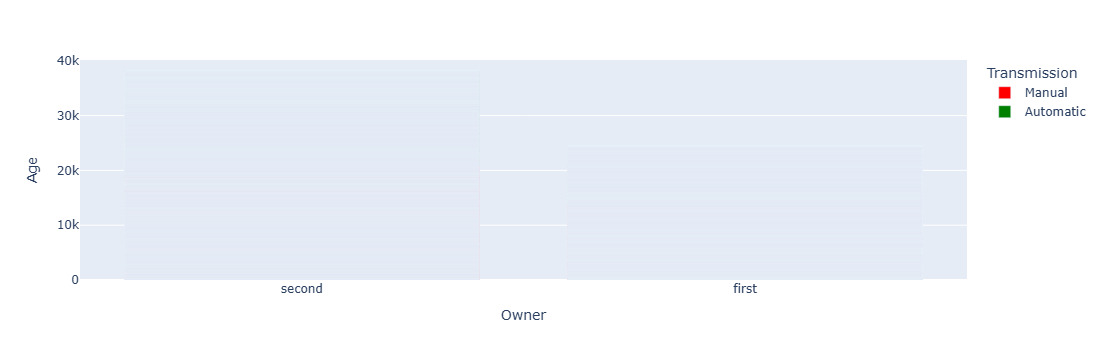

In [36]:
fig3